### K-Nearest Neighbors (KNN) - Label Classification

In [1]:
import sys
sys.path.append('../../')

# Import all required libraries
from utils.load import load
from utils.score import fold_cross_validate, visualize_classification_result
from utils.print import print_cross_validation_scores, print_scores
from constant.columns import FEATURES, LABEL

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

In [11]:
# Import data
df = pd.read_csv('./source/dataset.csv')
X, y = df[FEATURES], df[LABEL]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)

#### Find the best k to build the model with the best accuracy.

In [3]:
# Define the parameter values that should be searched
k_range = list(range(1, 31))

# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)

# Instantiate the grid
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='f1_macro')

# Fit the grid with data
grid.fit(X_train, y_train)

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: Data

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: Data

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='f1_macro')

In [4]:
# Get best n_neighbors
best_n_neighbors = grid.best_params_.get('n_neighbors')

# View the results
print("Best Score:", grid.best_score_)
print("Best Parameters:", grid.best_params_)

Best Score: 0.5519524467113694
Best Parameters: {'n_neighbors': 5}


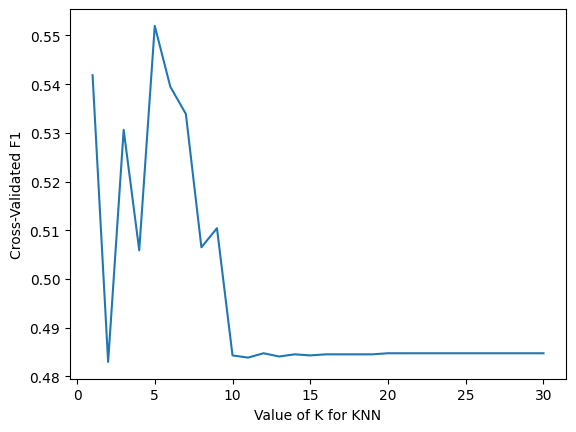

In [5]:
# Plot for KNN only
grid_mean_scores = grid.cv_results_['mean_test_score']
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated F1')
plt.show()

#### Find the best parameter

In [6]:
# Set the parameters by cross-validation
tuned_parameters = [{'n_neighbors': [best_n_neighbors], 'weights': ['uniform'], 'algorithm': ['auto'], 'p': [1, 2, 3, 4], 'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev']}]

# Use 'f1_macro' as the scoring method
clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring='f1_macro')

clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print(clf.best_params_)

print("Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for _mean, _std, _params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (_mean, _std * 2, _params))

print("Detailed classification report:")
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")

y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

clf.best_params_

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: Data

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: Data

Best parameters set found on development set:
{'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Grid scores on development set:
0.553 (+/-0.128) for {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.552 (+/-0.083) for {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
0.552 (+/-0.101) for {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 5, 'p': 3, 'weights': 'uniform'}
0.538 (+/-0.115) for {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 5, 'p': 4, 'weights': 'uniform'}
0.552 (+/-0.083) for {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.552 (+/-0.083) for {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
0.552 (+/-0.083) for {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 5, 'p': 3, 'weights': 'uniform'}
0.552 (+/-0.083) for {'algorith

{'algorithm': 'auto',
 'metric': 'minkowski',
 'n_neighbors': 5,
 'p': 1,
 'weights': 'uniform'}

#### Cross Validation

In [18]:
# Define the model
clf_cv = KNeighborsClassifier()
scores = fold_cross_validate(clf_cv, X_test, y_test)

# Print scores
print_cross_validation_scores(scores)

MACRO:
Precision: 0.6107 (0.1953)
Recall: 0.5455 (0.0809)
F1 score: 0.5473 (0.0885)
---------------------------------
MICRO:
Precision: 0.9213 (0.0365)
Recall: 0.9213 (0.0365)
F1 score: 0.9213 (0.0365)


#### Train Model

In [8]:
# Create and train the model
clf = KNeighborsClassifier(n_neighbors=best_n_neighbors, n_jobs=-1, weights='uniform', algorithm='auto', leaf_size=1, p=2, metric='minkowski')
clf.fit(X_train, y_train)

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(leaf_size=1, n_jobs=-1)

In [9]:
# Predict and print the score
y_pred = clf.predict(X_test)
print_scores(y_test, y_pred)

Accuracy: 0.9166666666666666
Precision: 0.42857142857142855
Recall: 0.125
F1: 0.19354838709677416


#### Visualize Result

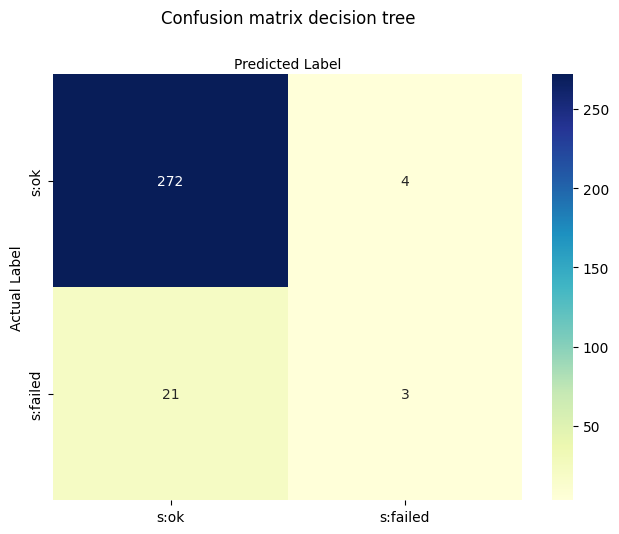

In [10]:
visualize_classification_result(y_test, y_pred)